# Heart Disease Risk Prediction: Logistic Regression Homework

## Introductory Context
Heart disease is the world's leading cause of death, claiming approximately 18 million lives each year, as reported by the World Health Organization. Predictive models like logistic regression can enable early identification of at-risk patients by analyzing clinical features such as age, cholesterol, and blood pressure. This not only improves treatment outcomes but also optimizes resource allocation in healthcare settings. In this homework, you'll implement logistic regression on the Heart Disease Dataset—a real-world UCI repository collection of 303 patient records with 14 features and a binary target (1 for disease presence, 0 for absence). You'll train models, visualize boundaries, apply regularization, and explore deployment via Amazon SageMaker to mimic a production pipeline.

## Homework Instructions
Complete this in a Jupyter notebook, implementing functions from class theory (e.g., sigmoid, cost, GD). Use NumPy, Pandas, and Matplotlib—no scikit-learn for core training. Emphasize exploration: Tune parameters, interpret results, and document findings.

In [80]:
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [82]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [83]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [84]:
df.shape

(270, 14)

In [85]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(1), int64(12), str(1)
memo

In [86]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [87]:
# Convert categorical target variable to numerical
df['target'] = df['Heart Disease'].map({'Presence':1, 'Absence':0})

df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


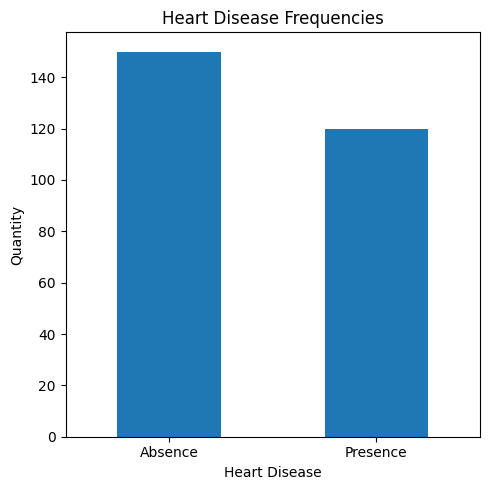

In [88]:

frequencies = df['Heart Disease'].value_counts()

plt.figure(figsize=(5,5))
frequencies.plot(kind='bar')
plt.title('Heart Disease Frequencies')
plt.ylabel('Quantity')
plt.xlabel('Heart Disease')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Selecting features to normalize

In [89]:
feature_names = [
    'Age',
    'Cholesterol',
    'BP',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

print(f"\nSelected features ({len(feature_names)}):")
for i, feature in enumerate(feature_names, 1):
    print(f"  {i}. {feature}")


Selected features (6):
  1. Age
  2. Cholesterol
  3. BP
  4. Max HR
  5. ST depression
  6. Number of vessels fluro


In [90]:
# Extract features and target as NumPy arrays
X = df[feature_names].values
y = df['target'].values

print(f"\n Extracted data:")
print(f"  X.shape = {X.shape} (n_samples={X.shape[0]}, n_features={X.shape[1]})")
print(f"  y.shape = {y.shape[0]}")


 Extracted data:
  X.shape = (270, 6) (n_samples=270, n_features=6)
  y.shape = 270


In [91]:
print(f"\n Original value ranges:")
print("-" * 80)
for i, feature in enumerate(feature_names):
    min_val = X[:, i].min()
    max_val = X[:, i].max()
    mean_val = X[:, i].mean()
    std_val = X[:, i].std()
    print(f"  {feature:25s}: [{min_val:7.2f}, {max_val:7.2f}]  μ={mean_val:7.2f}  σ={std_val:6.2f}")


 Original value ranges:
--------------------------------------------------------------------------------
  Age                      : [  29.00,   77.00]  μ=  54.43  σ=  9.09
  Cholesterol              : [ 126.00,  564.00]  μ= 249.66  σ= 51.59
  BP                       : [  94.00,  200.00]  μ= 131.34  σ= 17.83
  Max HR                   : [  71.00,  202.00]  μ= 149.68  σ= 23.12
  ST depression            : [   0.00,    6.20]  μ=   1.05  σ=  1.14
  Number of vessels fluro  : [   0.00,    3.00]  μ=   0.67  σ=  0.94


In [92]:
print("70/30 STRATIFIED SPLIT (MANUAL IMPLEMENTATION)")

np.random.seed(42)

# Obtain indices for each class
indices_clase_0 = np.where(y == 0)[0]
indices_clase_1 = np.where(y == 1)[0]

print(f"\n📊 Distribución original:")
print(f"  Clase 0 (Absence):  {len(indices_clase_0)} muestras ({len(indices_clase_0)/len(y)*100:.2f}%)")
print(f"  Clase 1 (Presence): {len(indices_clase_1)} muestras ({len(indices_clase_1)/len(y)*100:.2f}%)")

# Randomly mix each class
np.random.shuffle(indices_clase_0)
np.random.shuffle(indices_clase_1)


# Calculate split points (70% train, 30% test)
n_train_0 = int(0.7 * len(indices_clase_0))
n_train_1 = int(0.7 * len(indices_clase_1))

print(f"\n Split points (70/30):")
print(f"  Clase 0: {n_train_0} train, {len(indices_clase_0) - n_train_0} test")
print(f"  Clase 1: {n_train_1} train, {len(indices_clase_1) - n_train_1} test")

# Split each class
train_indices_0 = indices_clase_0[:n_train_0]
test_indices_0 = indices_clase_0[n_train_0:]

train_indices_1 = indices_clase_1[:n_train_1]
test_indices_1 = indices_clase_1[n_train_1:]

# Combine the sets
train_indices = np.concatenate([train_indices_0, train_indices_1])
test_indices = np.concatenate([test_indices_0, test_indices_1])

# Mix the combined indices
np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

# Create the final sets
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

70/30 STRATIFIED SPLIT (MANUAL IMPLEMENTATION)

📊 Distribución original:
  Clase 0 (Absence):  150 muestras (55.56%)
  Clase 1 (Presence): 120 muestras (44.44%)

 Split points (70/30):
  Clase 0: 105 train, 45 test
  Clase 1: 84 train, 36 test


In [93]:
train_class_0 = np.sum(y_train == 0)
train_class_1 = np.sum(y_train == 1)
test_class_0 = np.sum(y_test == 0)
test_class_1 = np.sum(y_test == 1)

print(f"\n📊 STRATIFICATION VERIFICATION:")
print("-" * 80)
print(f"{'Set':<15} {'Total':>8} {'Class 0':>12} {'%':>8} {'Class 1':>12} {'%':>8}")
print("-" * 80)
print(f"{'Original':<15} {len(y):>8} {len(indices_clase_0):>12} {len(indices_clase_0)/len(y)*100:>7.2f}% {len(indices_clase_1):>12} {len(indices_clase_1)/len(y)*100:>7.2f}%")
print(f"{'Train':<15} {len(y_train):>8} {train_class_0:>12} {train_class_0/len(y_train)*100:>7.2f}% {train_class_1:>12} {train_class_1/len(y_train)*100:>7.2f}%")
print(f"{'Test':<15} {len(y_test):>8} {test_class_0:>12} {test_class_0/len(y_test)*100:>7.2f}% {test_class_1:>12} {test_class_1/len(y_test)*100:>7.2f}%")


print("\n Successful stratification")





📊 STRATIFICATION VERIFICATION:
--------------------------------------------------------------------------------
Set                Total      Class 0        %      Class 1        %
--------------------------------------------------------------------------------
Original             270          150   55.56%          120   44.44%
Train                189          105   55.56%           84   44.44%
Test                  81           45   55.56%           36   44.44%

 Successful stratification


In [94]:

print("STANDARDIZATION")

# Calculate the mean and standard deviation of the train set
mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

print(f"\n📊 Statistics for normalization (calculated from the train set):")
print("-" * 80)
print(f"{'Feature':<25} {'Mean (μ)':>12} {'Std (σ)':>12}")
print("-" * 80)
for i, feature in enumerate(feature_names):
    print(f"{feature:<25} {mean_train[i]:>12.2f} {std_train[i]:>12.2f}")

# Apply standardization
X_train_normalized = (X_train - mean_train) / std_train
X_test_normalized = (X_test - mean_train) / std_train 

print("Applied standardization")

# Verify the standardization
print(f"\n📊 Post-normalization verification (train set):")
print("-" * 80)
print(f"{'Feature':<25} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
print("-" * 80)
for i, feature in enumerate(feature_names):
    mean_check = np.mean(X_train_normalized[:, i])
    std_check = np.std(X_train_normalized[:, i])
    min_check = np.min(X_train_normalized[:, i])
    max_check = np.max(X_train_normalized[:, i])
    print(f"{feature:<25} {mean_check:>12.4f} {std_check:>12.4f} {min_check:>12.2f} {max_check:>12.2f}")



STANDARDIZATION

📊 Statistics for normalization (calculated from the train set):
--------------------------------------------------------------------------------
Feature                       Mean (μ)      Std (σ)
--------------------------------------------------------------------------------
Age                              54.21         9.01
Cholesterol                     247.19        53.23
BP                              131.54        17.68
Max HR                          150.41        22.19
ST depression                     1.05         1.12
Number of vessels fluro           0.62         0.89
Applied standardization

📊 Post-normalization verification (train set):
--------------------------------------------------------------------------------
Feature                           Mean          Std          Min          Max
--------------------------------------------------------------------------------
Age                             0.0000       1.0000        -2.80         1.86
Cho

In [95]:
print(f"\n COMPLETE PREPARATION")
print("-" * 80)
print(f"Selected features: {len(feature_names)}")
print(f"  {', '.join(feature_names)}")
print(f"\nTraining set:")
print(f"  X_train_normalized.shape = {X_train_normalized.shape}")
print(f"  y_train.shape = {y_train.shape}")
print(f"  Distribution: Clase 0={train_class_0}, Clase 1={train_class_1}")
print(f"\nTest set:")
print(f"  X_test_normalized.shape = {X_test_normalized.shape}")
print(f"  y_test.shape = {y_test.shape}")
print(f"  Distribution: Clase 0={test_class_0}, Clase 1={test_class_1}")
print("="*80)
print(" STEP 1 COMPLETED")
print("="*80)


 COMPLETE PREPARATION
--------------------------------------------------------------------------------
Selected features: 6
  Age, Cholesterol, BP, Max HR, ST depression, Number of vessels fluro

Training set:
  X_train_normalized.shape = (189, 6)
  y_train.shape = (189,)
  Distribution: Clase 0=105, Clase 1=84

Test set:
  X_test_normalized.shape = (81, 6)
  y_test.shape = (81,)
  Distribution: Clase 0=45, Clase 1=36
 STEP 1 COMPLETED
